<a href="https://colab.research.google.com/github/ryanamundson1/gcolab/blob/master/pga_picker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import urllib, json
import pandas as pd
import numpy as np
import re
from itertools import permutations
from pulp import *
import urllib.parse
from datetime import datetime, timedelta

from configparser import ConfigParser  
config = ConfigParser()

#Hide my auth tokens
config.read('/opt/config/draft_picker.ini')  
token = config.get('auth', 'token')
basic_auth = config.get('auth', 'basic')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

AUTH_TOKEN = token


FD_GROUP = 49208
DK_GROUP = 38284
#FSD_GROUP = 1883754
YAHOO_GROUP = 7141935

LATEST_URL = "https://api.draftkings.com/draftgroups/v1/draftgroups/%s/draftables?format=json" % DK_GROUP
LATEST_PLAYERS ="https://api.fanduel.com/fixture-lists/%s/players" % FD_GROUP

LATEST_YAHOO = "https://dfyql-ro.sports.yahoo.com/v2/contestPlayers?lang=en-US&region=US&device=desktop&contestId=%s" % YAHOO_GROUP

#FANTASY_EVENTS = "https://www.fantasydraft.com/api/v1/events/%s/" % FSD_GROUP

host_value = 'api.fanduel.com'
origin_value = 'https://www.fanduel.com'
referer_value = 'https://www.fanduel.com/games'

headers = {'Sec-Fetch-Mode': 'cors',
            'X-Currency': 'USD',
            'Authorization' : 'Basic %s' % basic_auth, 
            'Accept' : 'application/json',
            'X-Auth-Token' : AUTH_TOKEN,
            'Host': host_value,
            'Origin': origin_value,
            'Referer': referer_value,
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

yheaders = {'Sec-Fetch-Mode': 'cors',
            'sec-fetch-site': 'same-site',
            'authority' : 'dfyql-ro.sports.yahoo.com', 
            'Accept' : '*/*',
            'Origin': 'https://sports.yahoo.com',
            'Referer': 'https://sports.yahoo.com/',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

req = urllib.request.Request(LATEST_PLAYERS, headers=headers)

response = urllib.request.urlopen(req)
data = json.loads(response.read())

current = pd.DataFrame.from_dict(data["players"])

fkresponse = urllib.request.urlopen(LATEST_URL)
fkdata = json.loads(fkresponse.read())

fkcurrent = pd.DataFrame.from_dict(fkdata["draftables"])

req = urllib.request.Request(LATEST_YAHOO, headers=yheaders)

response = urllib.request.urlopen(req)
data = json.loads(response.read())

ycurrent = pd.DataFrame.from_dict(data["players"]["result"])

# Remove players that are out or questionable
#current = current[(current.injured != "True") & (current.injury_severity != "HIGH") & (current.injury_status != "ir")]

current.head(5)
#fkcurrent.head(10)
# Let's copy the salary over so we can do FK stuff, too
fkcurrent["fk_salary"] = fkcurrent["salary"]
ycurrent["y_salary"] = ycurrent["salary"]
#ycurrent['projectedPoints'] = pd.to_numeric(ycurrent['projectedPoints'], errors='coerce')
fkcurrent.head(5)
ycurrent.head(5)

#req = urllib.request.Request(FANTASY_EVENTS, headers=yheaders)
    
#response = urllib.request.urlopen(req)
#data = json.loads(response.read())
    
#fdExternalId = data["external_id"]
#url = "https://www.fantasydraft.com/api/v1/fantasy/eventgames/%s/?event_id=%s" % (fdExternalId, FSD_GROUP)
#    
#req = urllib.request.Request(url, headers=yheaders)
#response = urllib.request.urlopen(req)
#data = json.loads(response.read())
    
#fantasyDcurrent = pd.DataFrame.from_dict(data["o"], orient='index')
    


#req = urllib.request.Request("https://www.fantasydraft.com/api/v1/eventgames/%s/" % fdExternalId, headers=yheaders)

#response = urllib.request.urlopen(req)
#data = json.loads(response.read())

#gameData =  json.loads(data["games"][0]["settings_json"])


#print(gameData)

current['game_par'] = 284
current['game_yards'] = 7346
current['game_rating'] = 76.2
current['game_slope'] = 146
current['game_stimp'] = 12.5
current['game_fairways'] = "Zoysia Grass"
current['game_rough'] = "Bermuda Grass"
current['game_greens'] = "Bermuda Grass"

#fantasyDcurrent.head()

#fantasyDcurrent.replace(regex=r'^Haotong.*$', value='Hao Tong Li', inplace=True)
fkcurrent.replace(regex=r'^Hao-Tong', value='Hao Tong', inplace=True)
current.replace(regex=r'^Hao-Tong', value='Hao Tong', inplace=True)
ycurrent.replace(regex=r'^Hao-Tong', value='Hao Tong', inplace=True)

#fantasyDcurrent.replace(regex=r'^Erik van Rooyen.*$', value='Erik Van Rooyen', inplace=True)
ycurrent.replace(regex=r'^Erik van Rooyen.*$', value='Erik Van Rooyen', inplace=True)

In [56]:
#print(fantasyDcurrent[fantasyDcurrent['n'].str.startswith('Erik')].head())
#dfbb = 

#merged[merged['first_name_x']=='Hao-Tong'].index.values.astype(int)[0]
#merged.at[88, 'sc'] = 

#print(ycurrent[ycurrent['firstName'].str.startswith('Byeong', na=False)].head(20))
#fantasyDcurrent.drop(['game_par', 'game_yards', 'game_rating', 'game_slope', 'game_stimp', 'game_fairways', 'game_greens', 'game_rough'], axis=1,  inplace=True)
#fantasyDcurrent.head()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


c     ei  sjte  sjcm        i sjavs     pp                n       sc       si     pa  t sjtt           sjny sjas
1834374  2020-08-27T16:30:00  42191    19    17  1834374  70.1  10522      Adam Hadwin  1170000   547931   7600  G    3         Canada  pro
1834422  2020-08-27T16:30:00  42993    23    16  1834422  70.0   8609     Bubba Watson  1330000   259662   8900  G    3  United States  pro
1834405  2020-08-27T16:30:00  42653    25    17  1834405  70.1   9000     Carlos Ortiz  1030000   517460   8300  G    3         Mexico  pro
1834360  2020-08-27T16:30:00  41952    14    13  1834360  69.6  11230  Patrick Cantlay  1540000   597620  10000  G    3  United States  pro
1834424  2020-08-27T16:30:00  43022    22    17  1834424  70.4  10166    Matthew Wolff  1470000  1157231   9300  G    2  United States  pro

In [49]:
import requests
from bs4 import BeautifulSoup

ff_headers = {
            'Referer': "https://www.footballdb.com/",
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

nf_proj = pd.DataFrame(columns=["name", "nf_proj", "nf_value", "nf_score"])

page = requests.get('https://www.numberfire.com/golf/daily-fantasy/daily-golf-projections', headers=ff_headers)

# Create a BeautifulSoup object
bs = BeautifulSoup(page.text, 'html.parser')

table_body=bs.find_all('tbody')
rows = table_body[1].find_all('tr')
players = table_body[0].find_all('tr')

for i, row in enumerate(players):
    cols = row.find_all('td')

    names = row.find_all('a')
    name = names[1].text.strip()

    cols=[x.text.strip() for x in cols]

    nf_proj = nf_proj.append({
      "name": name,
      "nf_proj":  float(cols[1]),
      "nf_score":  float(cols[4]),
      "nf_value": float(cols[3])
        }, ignore_index=True)


nf_proj.replace(regex=r'^Byeong-Hun An', value='Byeong Hun An', inplace=True)
nf_proj.replace(regex=r'^Harold Varner', value='Harold Varner III', inplace=True)
nf_proj.replace(regex=r'^Charles Howell', value='Charles Howell III', inplace=True)
nf_proj.replace(regex=r'^Alexander Noren', value='Alex Noren', inplace=True)
nf_proj.replace(regex=r'^Xin-Jun Zhang', value='Xinjun Zhang', inplace=True)
nf_proj.head()  

name  nf_proj  nf_value  nf_score
0   Dustin Johnson     78.5      5.45    -11.12
1    Justin Thomas     76.7      6.39     -8.69
2     Webb Simpson     75.0      6.64     -7.65
3         Jon Rahm     73.5      5.88     -8.57
4  Collin Morikawa     70.4      6.52     -5.78

In [50]:
import requests
from bs4 import BeautifulSoup
#https://www.rotowire.com/daily/tables/optimizer-golf.php?tour=PGA&site=FanDuel&projections=&type=main&slate=Travelers%20Championsh
ff_headers = {
            'Referer': "https://www.footballdb.com/",
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }



page = requests.get('https://www.rotowire.com/daily/golf/optimizer.php', headers=ff_headers)

# Create a BeautifulSoup object
bs = BeautifulSoup(page.text, 'html.parser')

slate = str(bs.find('body')['data-slate'])
#https://www.rotowire.com/daily/tables/optimizer-golf.php?tour=PGA&site=FanDuel&projections=&type=main&slate=Travelers%20Championsh
    
slate = slate.replace(" ", "%20")
    
print(slate)
    
page = requests.get('https://www.rotowire.com/daily/tables/optimizer-golf.php?tour=PGA&site=DraftKings&projections=&type=main&slate={}'.format(slate), headers=ff_headers)
    
rw_proj = pd.DataFrame.from_dict(page.json())
    
    
rw_proj['proj_points'] = pd.to_numeric(rw_proj['proj_points'], errors='coerce')

rw_proj.replace(regex=r'^Harold Varner', value='Harold Varner III', inplace=True)
rw_proj.replace(regex=r'^Charles Howell', value='Charles Howell III', inplace=True)
rw_proj.head()



TOUR%20Championship


id first_name   last_name             player injury  actions actions_trigger lock exclude like position real_position actual_position   cuts cuts_percent top_three top_ten  salary  salary_original  salary_custom  proj_points proj_rotowire proj_original  proj_site  proj_ceiling  proj_floor  proj_third_party_one  proj_third_party_two  proj_custom value  multiplier avg_round par_four puts_round greens_in_regulation drive_distance drive_accuracy ball_striking scrambling bounce_back sand_saves tee_round tee_start_hole tee_time ownership
0  668     Justin      Thomas      Justin Thomas         &#9881;            open            i             G             G               G  15/19         78.9         5       9   11900            11900              0       100.96        100.96        100.96          0             0           0                     0                     0            0   8.5           0      69.2    -49.0       28.6                 69.4          304.5           57.5         107.0       63.7        26.5       62.9         1              1   2:10PM     65.48
1  558     Dustin     Johnson     Dustin Johnson         &#9881;            open            i             G             G               G  10/14         71.4         4       6   15200            15200              0        97.92         97.92         97.92          0             0           0                     0                     0            0   6.4           0      69.4    -29.0       28.6                 69.3          310.4           60.5          52.0       60.2        30.8       55.4         1              1   2:20PM     63.25
2  898        Jon        Rahm           Jon Rahm         &#9881;            open            i             G             G               G  14/15         93.3         4       7   12700            12700              0        90.51         90.51         90.51          0             0           0                     0                     0            0   7.1           0      69.2    -27.0       28.5                 70.4          307.6           64.3          19.0       63.5        25.9       54.0         1              1   2:20PM     47.02
3  619       Rory     McIlroy       Rory McIlroy         &#9881;            open            i             G             G               G  14/14        100.0         3       6    9700             9700              0        89.32         89.32         89.32          0             0           0                     0                     0            0   9.2           0      69.2    -20.0       28.6                 68.2          314.2           56.8         114.0       60.1        20.1       43.0         1              1   1:30PM     42.62
4  908     Bryson  DeChambeau  Bryson DeChambeau         &#9881;            open            i             G             G               G  14/18         77.8         3       9   10100            10100              0        83.71         83.71         83.71          0             0           0                     0                     0            0   8.3           0      69.1    -55.0       28.1                 68.6          325.0           57.3          94.0       64.6        29.9       61.4         1              1   1:50PM     37.95

In [ ]:

import wget, os

url = 'https://rotogrinders.com/projected-stats/pga-golfer.csv?site=fanduel'
#filename = wget.download(url)
#os.system("wget '%s' -O roto_pga_proj.csv --load-cookies /opt/ml/work/golf/cookies.txt" % url)

roto_proj=pd.read_csv("/Users/ramundson/Downloads/pga-golfer (2).csv")

roto_proj.head(10)

Player  Salary  Team Position  Opp     Ceil   Floor  Points   pOWN%
0     Denny McCarthy    7000   NaN        G  NaN   60.200  25.800   43.00   1.10%
1           Jon Rahm   12000   NaN        G  NaN  103.250  44.250   73.75  21.00%
2  Scottie Scheffler    8700   NaN        G  NaN   60.284  25.836   43.06  15.70%
3          Sam Burns    7000   NaN        G  NaN   34.944  14.976   24.96   1.00%
4       Martin Laird    7600   NaN        G  NaN   41.762  17.898   29.83   0.40%
5    Jhonattan Vegas    7700   NaN        G  NaN   64.232  27.528   45.88   2.80%
6      Gary Woodland   10300   NaN        G  NaN   87.724  37.596   62.66  14.40%
7          Jim Furyk    8300   NaN        G  NaN   66.234  28.386   47.31   2.00%
8         Kevin Tway    7500   NaN        G  NaN   36.764  15.756   26.26   0.30%
9         Aaron Wise    8700   NaN        G  NaN   45.108  19.332   32.22   0.20%

In [51]:
import requests
from bs4 import BeautifulSoup


TID = 396
ff_headers = {
            'Referer': "https://www.footballdb.com/",
            'User-Agent': 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:76.0) Gecko/20100101 Firefox/76.0'
           }

page = requests.get('https://fantasydata.com/pga/fantasy-golf-projections', headers=ff_headers)


bs = BeautifulSoup(page.text, 'html.parser')

import shlex, subprocess

cookie = 'Cookie: _ga=GA1.2.927812899.1579017953; __adroll_fpc=582e9c566a3950026c4313cc58548946-1579017954525; __ar_v4=%7CNHFCO3TELVGCHHJD5FHXVD%3A20200903%3A1%7CZUS4OCBXGBDWLCGQSOCSQN%3A20200903%3A1%7C2YUP7TATPFC7XD6D2GIARW%3A20200903%3A1; _fsuid=1b1d0be3-74a2-4fa3-86f4-8161ec3029b0; __gads=ID=735513a5897858d5-226264b391c20006:T=1595990247:S=ALNI_Mbr2xzo4DcbMQfCVhfoKe8_r5RvLA; __qca=P0-608797061-1579017963781; _fbp=fb.1.1595990246634.1060910461; _hjid=a22ab7c4-f640-4707-9ff3-20c49d0f38d9; ASP.NET_SessionId=py1sabxqk0q5h4yqvywdjil3; ks03ndsapqq84662kglvmcya009273nhdkwsn=1843a0f9-66cf-4f19-b2d0-041bf937a78b; fsbotchecked=true; FantasyData_CookiesAccepted=1; _fssid=5328684c-62d2-4c36-a3b5-644567f09236; fssts=false; _cioid=59037; _fsloc=?i=US&c=Saint Paul; _gid=GA1.2.1930681694.1599154707; _gat=1; _cio=a86a2cd0-1073-d4b9-f3e8-854b211ac63b; __beaconTrackerID=xnzclw97g'
#cmd = "curl 'https://fantasydata.com/FantasyStatsGOLF/Projections_Read' -H 'authority: fantasydata.com' -H 'accept: application/json, text/javascript, */*; q=0.01' -H 'origin: https://fantasydata.com' -H 'x-requested-with: XMLHttpRequest' -H 'user-agent: 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:76.0) Gecko/20100101 Firefox/76.0' -H 'content-type: application/x-www-form-urlencoded; charset=UTF-8' -H 'sec-fetch-site: same-origin' -H 'sec-fetch-mode: cors' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H '%s'  --data 'sort=FantasyPoints-desc&pageSize=300&group=&filter=&filters.scope=&filters.season=&filters.tournament=%s&filters.searchtext=&filters.scoringsystem=3&filters.exportType=&filters.showfavs='" % (cookie, TID)
cmd  = "curl 'https://fantasydata.com/PGA_Projections/Projections_Read' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:76.0) Gecko/20100101 Firefox/76.0' -H 'Accept: application/json, text/javascript, */*; q=0.01' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Content-Type: application/x-www-form-urlencoded; charset=UTF-8' -H 'X-Requested-With: XMLHttpRequest' -H 'Origin: https://fantasydata.com' -H 'Connection: keep-alive' -H 'Referer: https://fantasydata.com/pga/fantasy-golf-projections' -H '%s' -H 'Cache-Control: max-age=0' -H 'TE: Trailers' --data-raw 'sort=FantasyPoints-desc&pageSize=300&group=&filter=&filters.scope=&filters.season=&filters.tournament=396&filters.searchtext=&filters.scoringsystem=&filters.exportType=&filters.showfavs='" % cookie

_fd_headers = {'Sec-Fetch-Mode': 'cors',
            'X-Currency': 'USD',
            'authority': 'fantasydata.com', 
            'Accept' : 'application/json',
            'origin': 'https://fantasydata.com',
            'referer': 'https://fantasydata.com/nfl/fantasy-football-leaders?season=2019&seasontype=3&scope=2&subscope=1&scoringsystem=3&startweek=2&endweek=2&aggregatescope=1&range=2',
            'x-requested-with': 'XMLHttpRequest',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

#out = os.popen(cmd).read()
out = os.popen(cmd).read()

print (out)

#r = requests.post(url, data=_fd_data, headers=_fd_headers)
data = json.loads(out)

#r = requests.post(url, data=_fd_data, headers=_fd_headers)

#with open('/opt/ml/work/fddata.json') as json_file:
#    data = json.load(json_file)

fd_proj = pd.DataFrame.from_dict(data["Data"])


fd_proj.head()
fd_proj.replace(regex=r'^Sung-Jae Im', value='Sungjae Im', inplace=True)
fd_proj.replace(regex=r'^Scott Scheffler', value='Scottie Scheffler', inplace=True)
fd_proj.replace(regex=r'^Harold Varner', value='Harold Varner III', inplace=True)
fd_proj.replace(regex=r'^Byeong-Hun An', value='Byeong Hun An', inplace=True)
fd_proj.replace(regex=r'^Charles Howell', value='Charles Howell III', inplace=True)
fd_proj.replace(regex=r'^JT Poston', value='J.T. Poston', inplace=True)
fd_proj.replace(regex=r'^Alexander Noren', value='Alex Noren', inplace=True)
fd_proj.replace(regex=r'^Xin-Jun Zhang', value='Xinjun Zhang', inplace=True)
fd_proj.replace(regex=r'^Sung-Hoon Kang', value='Sung Kang', inplace=True)


{"Data":[{"PlayerTournamentProjectionID":32563,"TournamentID":396,"PlayerID":40000115,"Name":"Daniel Berger","TotalScore":-7.47,"MadeCut":1.00,"Eagles":0.28,"Birdies":16.03,"Pars":47.10,"Bogeys":8.07,"DoubleBogeys":0.52,"WorseThanDoubleBogey":0.00,"StreaksOfThreeBirdiesOrBetter":0.34,"StreaksOfFourBirdiesOrBetter":0.01,"StreaksOfFiveBirdiesOrBetter":0.00,"RoundsWithFiveOrMoreBirdiesOrBetter":1.49,"ConsecutiveBirdieOrBetterCount":2.70,"BounceBackCount":2.19,"BogeyFreeRounds":0.27,"RoundsUnderSeventy":3.35,"Win":0.04,"OddsToWin":22.00,"OddsToWinDescription":"22/1","OddsSortValue":22.00,"OddsValue":"22/1","FanDuelSalary":10300,"FantasyDraftSalary":null,"DraftKingsSalary":9100,"FantasyPoints":101,"FantasyPointsFanDuel":95.16,"FantasyPointsDraftKings":101,"FantasyPointsFantasyDraft":148.32,"IsScrambled":false,"Rank":1,"StaticRank":0,"FantasyPosition":null,"PositionRank":null,"IsFavorite":false},{"PlayerTournamentProjectionID":32583,"TournamentID":396,"PlayerID":40001199,"Name":"Jon Rahm","T

In [44]:
#rw_proj.loc[rw_proj["player"].str.contains("How")].head(20)

fd_proj.head()

PlayerTournamentProjectionID  TournamentID  PlayerID               Name  TotalScore  MadeCut  Eagles  Birdies   Pars  Bogeys  DoubleBogeys  WorseThanDoubleBogey  StreaksOfThreeBirdiesOrBetter  StreaksOfFourBirdiesOrBetter  StreaksOfFiveBirdiesOrBetter  RoundsWithFiveOrMoreBirdiesOrBetter  ConsecutiveBirdieOrBetterCount  BounceBackCount  BogeyFreeRounds  RoundsUnderSeventy   Win  OddsToWin OddsToWinDescription  OddsSortValue OddsValue  FanDuelSalary FantasyDraftSalary  DraftKingsSalary  FantasyPoints  FantasyPointsFanDuel  FantasyPointsDraftKings  FantasyPointsFantasyDraft  IsScrambled  Rank  StaticRank FantasyPosition PositionRank  IsFavorite
0                         32563           396  40000115      Daniel Berger       -7.47      1.0    0.28    16.03  47.10    8.07          0.52                  0.00                           0.34                          0.01                          0.00                                 1.49                            2.70             2.19             0.27                3.35  0.04       22.0                 22/1           22.0      22/1          10300               None              9100            101                95.160                      101                     148.32        False     1           0            None         None       False
1                         32583           396  40001199           Jon Rahm       -7.20      1.0    0.41    16.32  46.09    8.43          0.75                  0.00                           0.79                          0.11                          0.04                                 1.74                            3.72             2.39             0.33                2.93  0.08        3.0                  3/1            3.0       3/1          12500               None             12700             93                89.386                       93                     146.03        False     2           0            None         None       False
2                         32573           396  40000015     Dustin Johnson       -6.95      1.0    0.43    17.27  44.11    9.23          0.77                  0.17                           0.59                          0.09                          0.00                                 1.89                            3.50             2.80             0.26                2.65  0.14        2.0                  2/1            2.0       2/1          14400               None             15200             92                90.352                       92                     141.64        False     3           0            None         None       False
3                         32565           396  40000322  Bryson DeChambeau       -6.73      1.0    0.50    17.21  43.92    9.29          1.07                  0.01                           0.52                          0.16                          0.00                                 1.87                            3.57             2.74             0.33                2.81  0.08       22.0                 22/1           22.0      22/1          10500               None             10100             91                90.375                       91                     139.88        False     4           0            None         None       False
4                         32587           396  40001313       Webb Simpson       -6.29      1.0    0.48    15.32  47.09    8.33          0.71                  0.07                           0.47                          0.02                          0.00                                 1.34                            3.37             2.04             0.27                2.75  0.06       10.0                 10/1           10.0      10/1          11300               None             11000             85                85.071                       85                     133.31        False     5           0            None         None       False

In [159]:
#https://dfyql-ro.sports.yahoo.com/v2/seriesPlayersLive?lang=en-US&region=US&device=desktop&seriesId=9666
import urllib, json
import pandas as pd
import numpy as np

#https://dfyql-ro.sports.yahoo.com/v2/seriesPlayersLive?lang=en-US&region=US&device=desktop&seriesId=10474
YAHOO_ACTAUL = 10879

yheaders = {'Sec-Fetch-Mode': 'cors',
            'sec-fetch-site': 'same-site',
            'authority' : 'dfyql-ro.sports.yahoo.com', 
            'Accept' : '*/*',
            'Origin': 'https://sports.yahoo.com',
            'Referer': 'https://sports.yahoo.com/',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

LIVE_ACTAULS_YAHOO = "https://dfyql-ro.sports.yahoo.com/v2/seriesPlayersLive?lang=en-US&region=US&device=desktop&seriesId=%s" % YAHOO_ACTAUL

req = urllib.request.Request(LIVE_ACTAULS_YAHOO, headers=yheaders)

response = urllib.request.urlopen(req)
data = json.loads(response.read())

yactauls = pd.DataFrame.from_dict(data["players"]["result"])

yactauls.loc[yactauls["points"] > 100].head()



code firstName    lastName sportCode jerseyNumber status                                           imageUrl                                      largeImageUrl                                               team              playerGameCode                                               game  salary  locked  originalSalary  projectedPoints starting lineupOrder primaryPosition eligiblePositions  fantasyPointsPerGame fantasyPointsHistory fppgHistory  fantasyPointsStdDev  playerSalaryId  points                                              stats liveStatus extendedStatus golfStatus
0   golf.p.9267    Dustin     Johnson      golf                 N/A  https://s.yimg.com/bt/api/res/1.2/VhmNNqUAIsqO...  https://s.yimg.com/bt/api/res/1.2/G1ndL1hdZG87...  {'code': 'golf', 'location': 'Columbia, South ...   golf.p.9267$golf.g.202046  {'code': 'golf.g.202046', 'remainingTimeUnit':...      50    True              45              0.0     true        None               G               [G]                   0.0                   []          []                  0.0         2428022   104.8  [{'abbr': 'B', 'quantity': '20', 'id': '4'}, {...       None           None       None
1  golf.p.20376    Xander  Schauffele      golf                 N/A  https://s.yimg.com/bt/api/res/1.2/pwKylbBoarDh...  https://s.yimg.com/bt/api/res/1.2/oAPfZW930Xd5...  {'code': 'golf', 'location': 'La Jolla, Califo...  golf.p.20376$golf.g.202046  {'code': 'golf.g.202046', 'remainingTimeUnit':...      40    True              43              0.0     true        None               G               [G]                   0.0                   []          []                  0.0         2428037   101.3  [{'abbr': 'B', 'quantity': '21', 'id': '4'}, {...       None           None       None

In [160]:

ROTO_ACTAUL_SLATE = '5f52655f735b3c0e76a05f29'

yheaders = {'Sec-Fetch-Mode': 'cors',
            'sec-fetch-site': 'same-site',
            'authority' : 'resultsdb-api.rotogrinders.com', 
            'Accept' : '*/*',
            'Origin': 'https://rotogrinders.com/resultsdb/site/draftkings/date/2020-08-09/sport/golf/slate/5f31567c7bf28b47ec58369d',
            'Referer': 'https://rotogrinders.com/resultsdb/site/draftkings/date/2020-08-09/sport/golf/slate/5f31567c7bf28b47ec58369d',
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36'
           }

ROTO_ACTAULS ='https://resultsdb-api.rotogrinders.com/api/contest-ownership?_slateId=%s' % ROTO_ACTAUL_SLATE


req = urllib.request.Request(ROTO_ACTAULS, headers=yheaders)

response = urllib.request.urlopen(req)
data = json.loads(response.read())

rotoactauls = pd.DataFrame.from_dict(data, orient='index')

rotoactauls.replace(regex=r'^Hao-Tong', value='Hao Tong', inplace=True)
rotoactauls.head()


name slatePosition  salary                       _id  actualFpts  projectedFpts  projectedOwnership  combinedOwnership  FootJoy Tee Off Challenge (PGA TOUR)  PGA TOUR $200K Birdie [20 Entry Max]  PGA TOUR $200K Pro Shop [$50K to 1st]  PGA TOUR $500K Signature Hole [$100K to 1st]  PGA TOUR $200K Stinger [$50K to 1st]  PGA TOUR $300K Driver [$100K to 1st, Single Entry]  PGA TOUR $500K Drive the Green [$100K to 1st]  PGA TOUR $1.55M East Lake Ending [$500K to 1st]  PGA TOUR $20K Fore [20 Entry Max]  PGA TOUR $40K Short Game [20 Entry Max]  PGA TOUR $10K Quarter Jukebox [Just $0.25!]  PGA TOUR $10K Chip Shot [20 Entry Max]  PGA TOUR $100K Clubhouse [$20K to 1st]  PGA TOUR $40K mini-MAX [150 Entry Max]  PGA TOUR $50K Slice [2x Min Cash]  PGA TOUR $25K Club Twirl [$5K to 1st]  PGA TOUR $5 Double Up  PGA TOUR Single Entry $100 Double Up  PGA TOUR Single Entry $250 Double Up  PGA TOUR Single Entry $25 Double Up  PGA TOUR GIANT $25 Double Up [Single Entry]  \
Dustin Johnson    Dustin Johnson             G   15200  5f56eb5371b5870eef80da33       107.0          69.20               0.249             8.2209                                0.2040                                0.2001                                   0.12                                        0.1380                                0.1487                                             0.1267                                          0.2024                                           0.1941                             0.1649                                   0.1914                                       0.1991                                  0.1573                                  0.1735                                  0.1705                             0.1345                                 0.1284                 0.0912                                0.1024                                0.1364                               0.1046                                       0.1251   
Jon Rahm                Jon Rahm             G   12700  5f56eb5371b5870eef80da32        94.5          77.20               0.256            21.9534                                0.2521                                0.2693                                   0.31                                        0.3057                                0.3173                                             0.2575                                          0.2611                                           0.2653                             0.3021                                   0.2804                                       0.2741                                  0.3112                                  0.4388                                  0.2914                             0.3392                                 0.3172                 0.5724                                0.4398                                0.6364                               0.4118                                       0.3634   
Justin Thomas      Justin Thomas             G   11900  5f56eb5371b5870eef80da31       101.0          71.55               0.278            18.1865                                0.2102                                0.2517                                   0.44                                        0.3631                                0.3068                                             0.3511                                          0.2590                                           0.2656                             0.2507                                   0.2393                                       0.2309                                  0.2373                                  0.3980                                  0.2331                             0.2911                                 0.2764                 0.2471                                0.2651                                0.3182                               0.2549                                       0.2677   
Webb Simpson        Webb Simpson             G   11000  

In [ ]:
rotoactauls.loc[rotoactauls.name.str.contains("H")].head(5)

name slatePosition  salary                       _id  actualFpts projectedFpts projectedOwnership  combinedOwnership  PGA TOUR $450K Drive the Green [$100K to 1st]  PGA TOUR $250K Birdie [20 Entry Max]  PGA TOUR $200K Stinger [$50K to 1st]  PGA TOUR $402K 19th Hole [$100K to 1st]  PGA TOUR $600K Signature Hole [$150K to 1st]  PGA TOUR $350K Driver [$100K to 1st, Single Entry]  PGA TOUR $1.55M Beantown Battle [$500K to 1st]  PGA TOUR $30K Fore [20 Entry Max]  PGA TOUR $142K Country Club [$50K to 1st]  PGA TOUR $15K Chip Shot [20 Entry Max]  PGA TOUR $50K mini-MAX [150 Entry Max]  PGA TOUR $30.2K Club Twirl [$5K to 1st]  PGA TOUR $12.5K Quarter Jukebox [Just $0.25!]  PGA TOUR $50K Slice [2x Min Cash]  PGA TOUR $100K Thunderdome [$50K to 1st]  PGA TOUR $45K Short Game [20 Entry Max]  PGA TOUR $60K Driving Range [3 Entry Max]  PGA TOUR $100K Albatross [Single Entry]  PGA TOUR $75K Long Drive [Single Entry]  PGA TOUR $40K Long Drive [Single Entry]  \
Hideki Matsuyama  Hideki Matsuyama             G    8600  5f433ccfd77c250562a96557        80.5          None               None            18.5117                                         0.1333                                0.1321                                0.1967                                   0.3134                                        0.2198                                              0.1878                                          0.1400                             0.1867                                       0.20                                  0.1852                                  0.1728                                   0.2025                                         0.1415                             0.2069                                      0.30                                   0.1399                                     0.2342                                   0.1358                                   0.1921                                   0.2275   
Viktor Hovland      Viktor Hovland             G    8200  5f433ccfd77c250562a96553       104.5          None               None             8.6590                                         0.1203                                0.1205                                0.1247                                   0.1119                                        0.1016                                              0.1327                                          0.1215                             0.1218                                       0.08                                  0.1252                                  0.1075                                   0.1363                                         0.1178                             0.1246                                      0.15                                   0.1177                                     0.1419                                   0.1338                                   0.1152                                   0.1374   
Tyrrell Hatton      Tyrrell Hatton             G    8000  5f433ccfd77c250562a96550        92.0          None               None             9.5185                                         0.1298                                0.1290                                0.1287                                   0.1343                                        0.1474                                              0.1440                                          0.1351                             0.1381                                       0.13                                  0.1568                                  0.1333                                   0.1600                                         0.1382                             0.1402                                       NaN                                   0.1360                                     0.1216                                   0.1408                                   0.1309                                   0.1351   
Billy Horschel      Billy Horschel             G    7900  5f433ccfd77c

In [161]:
#actuals = pd.merge(fb_actuals, watson_actuals)

actuals = yactauls
actuals.head()

dateString = datetime.now().strftime('%Y-%m-%d')

actuals.to_csv('/opt/ml/work/golf/%s.yahoo.actuals.csv' % dateString)
rotoactauls.to_csv('/opt/ml/work/golf/%s.rotogrinders.actuals.csv' % dateString)


In [45]:
def last5(x):
  
  if isinstance(x.recent_games_played_stats, float):
    last_5 = 0
  else:
    last_5 = x.recent_games_played_stats["LAST_5"]["fppg"]
  return last_5

def world_rank(x):

  AttributeError
  try:
    if isinstance(x.playerAttributes, float) or not x.playerAttributes:
      x["w_golf_rank"] = 0
      return x
  except AttributeError:
    x["w_golf_rank"] = 0
    return x

  #print(x.playerAttributes[0])
  rank = int(x.playerAttributes[0]["value"])
  
  x["w_golf_rank"] = rank
  return x

def last3(x):
  if isinstance(x.recent_games_played_stats, float):
    last_3 = 0
  else:
    last_3 = x.recent_games_played_stats["LAST_3"]["fppg"]
  return last_3

def startTime(x):
  if isinstance(x.tee_time, float) or not x.tee_time:
    start_time = 0
  else:
    try:
      am_pm = x.tee_time[-2:]
      t = x.tee_time[:-2]
      (h, m) = t.split(':')
      h = int(h)
      m = int(m)
      if am_pm == "PM":
        h = h + 12


      start_time = h * 60 + m
    except:
      print(x)
  return start_time

def calculatePoints2(x):
  
  x.fillna(0.0, inplace=True)
  
  points = x.fppg
  
  
  #print ("name: {} points: {}".format(x["name"], points))
  return points
  

In [ ]:
merged.head()
#fkcurrent.head()

dvp_rank first_name_x                                          fixture       fppg         id_x                                                                 images  injured injury_details injury_severity injury_status jersey_number known_name last_name_x max_rank                                news  played                                                  player_card_url position_x                                projected_fantasy_points projected_starting_order  rank                                              recent_games_played_stats  removed                                                  roster_position_stats  salary_x     sport_specific  starting_order  swappable  team  tier            videos                                                            competition                                                           competitions        displayName draftAlerts                                                    draftStatAttributes  draftableId firstName_x  fk_salary  \
0     None       Dustin  {'_members': ['167192'], '_ref': 'fixtures.id'}  81.924998  48845-78289  {'default': {'height': 200, 'url': 'https://d17odppiik753x.cloudfr...    False           None            None          None          None       None     Johnson     None  {'latest': '2020-08-23T23:52:42Z'}      12  https://www.fanduel.com/mobile/games/48845/players/48845-78289/          G  {'projected_fantasy_points': 63.57, 'supported': True}                     None  1000  {'LAST_10': {'fppg': 74.46000000000001, 'played': 10}, 'LAST_3': {...    False  [{'fppg': 81.9249979654948, 'player_position': 'G', 'roster_positi...     12000   {'cuts_made': 9}              -1       True  None  None  {'latest': None}  {'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispla...  [{'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispl...     Dustin Johnson          []  [{'id': 795, 'value': '82.5', 'sortValue': '82.5'}, {'id': 756, 'v...     15187929      Dustin      11500   
1     None          Jon  {'_members': ['167192'], '_ref': 'fixtures.id'}  90.528573  48845-78707  {'default': {'height': 200, 'url': 'https://d17odppiik753x.cloudfr...    False           None            None          None          None       None        Rahm     None  {'latest': '2020-08-24T00:02:25Z'}      14  https://www.fanduel.com/mobile/games/48845/players/48845-78707/          G  {'projected_fantasy_points': 61.57, 'supported': True}                     None  1000  {'LAST_10': {'fppg': 78.87, 'played': 10}, 'LAST_3': {'fppg': 82.1...    False  [{'fppg': 90.52857317243304, 'player_position': 'G', 'roster_posit...     11800  {'cuts_made': 13}              -1       True  None  None  {'latest': None}  {'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispla...  [{'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispl...           Jon Rahm          []  [{'id': 795, 'value': '87.4', 'sortValue': '87.4'}, {'id': 756, 'v...     15187930         Jon      11000   
2     None       Justin  {'_members': ['167192'], '_ref': 'fixtures.id'}  90.752944  48845-78893  {'default': {'height': 200, 'url': 'https://d17odppiik753x.cloudfr...    False           None            None          None          None       None      Thomas     None  {'latest': '2020-08-24T01:09:49Z'}      17  https://www.fanduel.com/mobile/games/48845/players/48845-78893/          G  {'projected_fantasy_points': 68.55, 'supported': True}                     None  1000  {'LAST_10': {'fppg': 83.39, 'played': 10}, 'LAST_3': {'fppg': 87.3...    False  [{'fppg': 90.75294404871323, 'player_position': 'G', 'roster_posit...     11700  {'cuts_made': 14}              -1       True  None  None  {'latest': None}  {'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispla...  [{'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispl...      Justin Thomas          []  [{'id': 795, 'value': '85.8', 'sortValue': '85.8'}, {'id': 756, 'v...     15187931      Justin      10800   
3     None       Bryso

In [57]:
merged = None

def do_merge():
  #for x in current.draftStatAttributes:
  #  print(x)

  cols_to_use1 = fkcurrent.columns.difference(current.columns)
  cols_to_use2 = ycurrent.columns.difference(current.columns)
  
  merged = pd.merge(current, fkcurrent[cols_to_use1],  how='left', left_on=['first_name','last_name'], right_on = ['firstName','lastName'])

  merged = pd.merge(merged, ycurrent[cols_to_use2],  how='left', left_on=['first_name','last_name'], right_on = ['firstName','lastName'])

  merged = pd.merge(merged, fd_proj,  how='left', left_on=['displayName'], right_on = ['Name'])

  merged = pd.merge(merged, nf_proj,  how='left', left_on=['displayName'], right_on = ['name'])

  merged = pd.merge(merged, fantasyDcurrent,  how='left', left_on=['displayName'], right_on = ['n'])

  print(merged.head())

  merged = merged[merged['first_name'].notnull()]
    
  merged['name'] = merged.apply(lambda x: x.first_name + " " + x.last_name, axis=1) 

  merged = pd.merge(merged, rw_proj,  how='outer', left_on=['name'], right_on = ['player'])
  
  # add averages
  merged['avg_last_three'] = merged.apply(last3, axis=1) 
  merged['avg_last_five'] = merged.apply(last5, axis=1)
  merged['start_time'] = merged.apply(startTime, axis=1)
  merged = merged.apply(world_rank, axis=1) 

  merged = merged.drop_duplicates(subset='name')

  return merged

def do_load(mdate):
  return pd.read_csv("/opt/ml/work/golf/%s.all_data.csv" % mdate, index_col=0) 

merged = do_merge()
#merged = do_load('2020-03-04')
merged.head()


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


  dvp_rank first_name                                          fixture       fppg           id                                             images  injured injury_details injury_severity injury_status jersey_number known_name last_name max_rank                                news  played                                    player_card_url position                           projected_fantasy_points projected_starting_order  rank                          recent_games_played_stats  removed                              roster_position_stats  salary     sport_specific  starting_order  swappable  team  tier            videos  game_par  game_yards  game_rating  game_slope  game_stimp game_fairways     game_rough    game_greens                                        competition                                       competitions      displayName draftAlerts                                draftStatAttributes  draftableId firstName_x  fk_salary  isDisabled  isSwappable lastName_x newsStatus  \
0   

dvp_rank first_name_x                                          fixture       fppg         id_x                                             images  injured injury_details injury_severity injury_status jersey_number known_name last_name_x max_rank                                news  played                                    player_card_url position_x                           projected_fantasy_points projected_starting_order  rank                          recent_games_played_stats  removed                              roster_position_stats  salary_x     sport_specific  starting_order  swappable  team  tier            videos  game_par  game_yards  game_rating  game_slope  game_stimp game_fairways     game_rough    game_greens                                        competition                                       competitions      displayName draftAlerts                                draftStatAttributes  draftableId firstName_x  fk_salary  isDisabled  isSwappable lastName_x  \
0     None       Dustin  {'_members': ['167175'], '_ref': 'fixtures.id'}  82.107694  49208-78289  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None     Johnson     None  {'latest': '2020-08-30T23:34:52Z'}      13  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 79.43, 'supported...                     None  1000  {'LAST_10': {'fppg': 77.31, 'played': 10}, 'LA...    False  [{'fppg': 82.10769418569711, 'player_position'...     14400  {'cuts_made': 10}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...   Dustin Johnson          []  [{'id': 795, 'value': '82.5', 'sortValue': '82...     15246095      Dustin      15200       False         True    Johnson   
1     None          Jon  {'_members': ['167175'], '_ref': 'fixtures.id'}  91.266667  49208-78707  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None        Rahm     None  {'latest': '2020-08-30T23:46:51Z'}      15  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 74.43, 'supported...                     None  1000  {'LAST_10': {'fppg': 76.7, 'played': 10}, 'LAS...    False  [{'fppg': 91.26666666666667, 'player_position'...     12500  {'cuts_made': 14}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...         Jon Rahm          []  [{'id': 795, 'value': '87.9', 'sortValue': '87...     15246096         Jon      12700       False         True       Rahm   
2     None       Justin  {'_members': ['167175'], '_ref': 'fixtures.id'}  88.483331  49208-78893  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None      Thomas     None  {'latest': '2020-08-31T00:16:22Z'}      18  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 77.52, 'supported...                     None  1000  {'LAST_10': {'fppg': 77.11, 'played': 10}, 'LA...    False  [{'fppg': 88.48333062065973, 'player_position'...     12000  {'cuts_made': 15}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...    Justin Thomas          []  [{'id': 795, 'value': '84.1', 'sortValue': '84...     15246097      Justin      11900       False         True     Thomas   
3     None         Webb  {'_me

In [ ]:

results = pd.merge(merged, yactauls[['firstName','lastName','points']],  how='left', left_on=['first_name_x','last_name_x'], right_on = ['firstName','lastName'])
results = pd.merge(results, rotoactauls[['name','actualFpts']],  how='left', left_on=['displayName'], right_on = ['name'])

print(results.head())
results = results.loc[:,~results.columns.duplicated()]


code_columns = [] #"injury_severity", "injury_status"
float_columns = ["fppg", "fk_salary", "salary_x", "par_four", "cuts_percent", "drive_distance", "greens_in_regulation", "drive_accuracy", "ball_striking", "scrambling", "bounce_back", "sand_saves", "avg_round", "puts_round", "top_three", "top_ten", "fantasyPointsPerGame", "fantasyPointsStdDev", "y_salary",  "proj_points", "proj_rotowire", "value", "avg_last_three", "avg_last_five", "w_golf_rank", "sjtt", "game_par", "game_yards", "game_slope",
                 "Eagles", "Birdies", "Pars", "Bogeys", "WorseThanDoubleBogey", "DoubleBogeys", "StreaksOfThreeBirdiesOrBetter", "StreaksOfFourBirdiesOrBetter", "StreaksOfFiveBirdiesOrBetter", "RoundsWithFiveOrMoreBirdiesOrBetter", "ConsecutiveBirdieOrBetterCount", "BounceBackCount", "BogeyFreeRounds", "RoundsUnderSeventy", "Win", "OddsToWin"]
code_features = []
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

lb_make = LabelEncoder()

#for name in code_columns:
#  merged[name].fillna("none", inplace=True) 
#  print ("creating %s" % codeName)
#  merged[codeName] = lb_make.fit_transform(merged[name])
#  code_features.append(codeName)

# Drop any N/A or infinite values
X = results[code_columns + float_columns]
X = X.loc[:,~X.columns.duplicated()]

X = pd.get_dummies(X, columns=code_columns, drop_first=True)


y = results.actualFpts

# Drop any N/A or infinite values
X.replace([np.inf, -np.inf], np.nan)

X.fillna(0, inplace=True)

y.replace([np.inf, -np.inf], np.nan)

y.fillna(0, inplace=True)

X = X.astype(np.float64)

# Write this out to load later
dateString = datetime.now().strftime('%Y-%m-%d')

results.to_csv('/opt/ml/work/golf/%s.results.csv' % dateString)

X.to_csv('/opt/ml/work/golf/%s.train_data.csv' % dateString)

y.to_csv('/opt/ml/work/golf/%s.predict_train_data.csv' % dateString)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train.head()

print(y_train.shape)
print(X_train.shape)


  dvp_rank first_name_x                                          fixture       fppg         id_x                                                                 images  injured injury_details injury_severity injury_status jersey_number known_name last_name_x max_rank                                news  played                                                  player_card_url position_x                                projected_fantasy_points projected_starting_order  rank                                              recent_games_played_stats  removed                                                  roster_position_stats  salary_x     sport_specific  starting_order  swappable  team  tier            videos                                                            competition                                                           competitions        displayName draftAlerts                                                    draftStatAttributes  draftableId firstName_x  fk_salary  \
0    

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


(49,)
(49, 45)


In [ ]:
results.loc[results['actualFpts']<1].head(20)

dvp_rank first_name_x                                          fixture       fppg         id_x                                                                 images  injured injury_details injury_severity injury_status jersey_number known_name last_name_x max_rank                                news  played                                                  player_card_url position_x                               projected_fantasy_points projected_starting_order  rank                                              recent_games_played_stats  removed                                                  roster_position_stats  salary_x     sport_specific  starting_order  swappable  team  tier            videos                                                            competition                                                           competitions   displayName draftAlerts                                                    draftStatAttributes  draftableId firstName_x  fk_salary  isDisabled  \
6     None         Webb  {'_members': ['167192'], '_ref': 'fixtures.id'}  93.871425  48845-78804  {'default': {'height': 200, 'url': 'https://d17odppiik753x.cloudfr...    False           rest            HIGH             o          None       None     Simpson     None  {'latest': '2020-08-25T19:08:50Z'}      14  https://www.fanduel.com/mobile/games/48845/players/48845-78804/          G  {'projected_fantasy_points': None, 'supported': True}                     None  1000  {'LAST_10': {'fppg': 75.7, 'played': 10}, 'LAST_3': {'fppg': 96.16...    False  [{'fppg': 93.87142508370536, 'player_position': 'G', 'roster_posit...     11300  {'cuts_made': 12}              -1       True  None  None  {'latest': None}  {'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispla...  [{'competitionId': 5635573, 'name': 'BMW Championship', 'nameDispl...  Webb Simpson          []  [{'id': 795, 'value': '89.4', 'sortValue': '89.4'}, {'id': 756, 'v...     15187934        Webb      10100       False   

   isSwappable lastName_x newsStatus                                         playerAttributes  playerDkId playerGameAttributes playerGameHash  playerId                                     playerImage160                                  playerImage50                                  playerImage65                                   playerImageFull  rosterSlotId   shortName status_x teamAbbreviation  teamId teamLeagueSeasonAttributes         code eligiblePositions                                              fantasyPointsHistory  fantasyPointsPerGame  fantasyPointsStdDev firstName_y                                                       fppgHistory                                                                   game                                                               imageUrl jerseyNumber                                                          largeImageUrl lastName_y lineupOrder  locked noteFreshness  originalSalary             playerGameCode  playerSalaryId  points_x  \
6         True    Simpson     Recent  [{'name': 'Official World Golf Ranking', 'value': '6'}]         913                   []    703-5635573       703  https://dkn.gs/playerimages/m/golf_retina/703.png  https://dkn.gs/playerimages/m/golf_50/703.png  https://dkn.gs/playerimages/m/golf_65/703.png  https://dkn.gs/playerimages/golf/players/703.png           118  W. Simpson        O             Golf      -5                         []  golf.p.8478               [G]  [102.8, 108.3, 53.6, 81.0, 8.0, 101.2, 146.5, 21.0, 40.1, 131.7]             85.953846                41.56        Webb  [102.8, 108.3, 53.6, 81.0, 8.0, 101.2, 146.5, 21.0, 40.1, 131.7]  {'code': 'golf.g.202027', 'started': False, 'startTime': 159854580...  https://s.yimg.com/bt/api/res/1.2/gRPMsmVHB6kY1109NuK40Q--/YXBwaWQ...               https://s.yimg.com/bt/api/res/1.2/szFnnq5vHHN_gqth_Sm89w--/YXBwaWQ...    Simpson        None    True         FRESH              44  golf.p.8478$golf.g.202027         2418214         0   

  primar

In [6]:
# let's add last week's stuff, too
from sklearn.model_selection import train_test_split
code_columns = [] #"injury_severity", "injury_status"
float_columns = ["fppg", "fk_salary", "salary_x", "par_four", "cuts_percent", "drive_distance", "greens_in_regulation", "drive_accuracy", "ball_striking", "scrambling", "bounce_back", "sand_saves", "avg_round", "puts_round", "top_three", "top_ten", "fantasyPointsPerGame", "fantasyPointsStdDev", "y_salary",  "proj_points", "proj_rotowire", "value", "avg_last_three", "avg_last_five", "w_golf_rank", "sjtt", "game_par", "game_yards", "game_slope",
                 "Eagles", "Birdies", "Pars", "Bogeys", "WorseThanDoubleBogey", "DoubleBogeys", "StreaksOfThreeBirdiesOrBetter", "StreaksOfFourBirdiesOrBetter", "StreaksOfFiveBirdiesOrBetter", "RoundsWithFiveOrMoreBirdiesOrBetter", "ConsecutiveBirdieOrBetterCount", "BounceBackCount", "BogeyFreeRounds", "RoundsUnderSeventy", "Win", "OddsToWin"]


def load_prediction_vars(dtrain):
  res = pd.read_csv("/opt/ml/work/golf/%s.results.csv" % dtrain, index_col=0) 
  X = res[code_columns + float_columns]
  X = X.loc[:,~X.columns.duplicated()]

  X = pd.get_dummies(X, columns=code_columns, drop_first=True)


  y = res.actualFpts
  #X = pd.read_csv("/opt/ml/work/golf/%s.train_data.csv" % dtrain, index_col=0) 
  #y = pd.read_csv("/opt/ml/work/golf/%s.predict_train_data.csv" % dtrain, header=None, index_col=0)
  return X, y

X, y = load_prediction_vars("2020-09-01")

#X2, y2 = load_prediction_vars("2020-07-07")
#X = X.append(X2)
#y = y.append(y2)


#X2, y2 = load_prediction_vars("2020-07-13")
#X = X.append(X2)
#y = y.append(y2)

#X2, y2 = load_prediction_vars("2020-07-21")
#X = X.append(X2)
#y = y.append(y2)

#X2, y2 = load_prediction_vars("2020-08-03")
#X = X.append(X2)
#y = y.append(y2)


X2, y2 = load_prediction_vars("2020-08-11")
X = X.append(X2)
y = y.append(y2)


X2, y2 = load_prediction_vars("2020-08-18")
X = X.append(X2)
y = y.append(y2)


X2, y2 = load_prediction_vars("2020-08-25")
X = X.append(X2)
y = y.append(y2)


# Drop any N/A or infinite values
X.replace([np.inf, -np.inf], np.nan)

X.fillna(0, inplace=True)

y.replace([np.inf, -np.inf], np.nan)

y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

X_test.head()

fppg  fk_salary  salary_x  par_four  cuts_percent  drive_distance  greens_in_regulation  drive_accuracy  ball_striking  scrambling  bounce_back  sand_saves  avg_round  puts_round  top_three  top_ten  fantasyPointsPerGame  fantasyPointsStdDev  y_salary  proj_points  proj_rotowire  value  avg_last_three  avg_last_five  w_golf_rank  sjtt  game_par  game_yards  game_slope  Eagles  Birdies   Pars  Bogeys  WorseThanDoubleBogey  DoubleBogeys  StreaksOfThreeBirdiesOrBetter  StreaksOfFourBirdiesOrBetter  StreaksOfFiveBirdiesOrBetter  RoundsWithFiveOrMoreBirdiesOrBetter  ConsecutiveBirdieOrBetterCount  BounceBackCount  BogeyFreeRounds  RoundsUnderSeventy   Win  OddsToWin
38   57.026668     7400.0    9100.0      16.0          68.8           297.3                  63.6            52.7          389.0        59.6         18.5        46.6       70.6        28.8        3.0      3.0             51.053333                29.92      30.0        60.49          60.49    8.2       38.400000          40.26           21   3.0     284.0      7342.0       152.0    0.45    13.19  37.47    7.39                  0.08          0.69                           0.40                          0.07                          0.00                                 1.20                            2.47             1.79             0.11                1.98  0.01      123.0
44   58.161112     7300.0    8900.0     -17.0          61.1           288.8                  72.5            66.0           92.0        64.3         20.6        51.5       70.3        29.5        0.0      3.0             54.735294                27.82      20.0        49.06          49.06    6.7       75.600000          69.20          153   3.0     284.0      7342.0       152.0    0.32    12.10  38.04    6.48                  0.08          0.79                           0.51                          0.05                          0.00                                 0.96                            2.75             1.22             0.26                1.95  0.01       91.5
6    93.871425    10100.0   11300.0       0.0           0.0             0.0                   0.0             0.0            0.0         0.0          0.0         0.0        0.0         0.0        0.0      0.0             85.953846                41.56      44.0        89.40          89.40    8.9       96.166667          78.42            6   8.0     284.0      6588.0       146.0    0.52    16.75  46.55    7.62                  0.05          0.51                           0.55                          0.04                          0.00                                 1.75                            3.97             2.08             0.39                1.83  0.04       12.0
114  65.976190     6600.0    7300.0     -22.0          66.7           290.6                  68.8            64.7          166.0        60.9         23.3        46.3       70.5        28.9        2.0      3.0             61.085714                32.81      21.0        43.80          43.80    6.6       68.800000          65.22           73   3.0     288.0      7127.0       129.0    0.52    11.68  36.81    7.83                  0.07          0.82                           0.39                          0.10                          0.04                                 0.96                            2.37             1.91             0.19                1.09  0.00      171.5
8    89.420001     9400.0   11000.0     -17.0          90.9           301.3                  70.4            63.1           40.0        58.9         27.9        54.0       69.7        28.6        1.0      3.0             81.888889                25.53      43.0        68.53          68.53    7.3       76.433333          76.12           10   3.0     288.0      7127.0       129.0    0.39    15.61  38.08    7.74                  0.16          0.79                           0.60                          0.20                          0.00                                 1.71                            3.80  

In [7]:
#y_test = X_test[float_columns]
#X_train = X_train[float_columns]
#X = X[float_columns]
X.shape

(522, 45)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import matplotlib as plt
from matplotlib.pyplot import subplots
import joblib
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
print ("Starting random forest param search")
gscr = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(9,20,3),
            'n_estimators': (50, 100, 1000, 2500, 5000),
            'min_impurity_decrease': (0.000, 0.0001, 0.003, 0.01, 0.06),
            'ccp_alpha': [0.0, 0.01, 0.03]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#grid_result = gscr.fit(X_train, y_train)
#best_params_r = grid_result.best_params_

best_params_r = {'ccp_alpha': 0.01, 'max_depth': 12, 'min_impurity_decrease': 0.0, 'n_estimators': 50}
print(best_params_r)

rfr = RandomForestRegressor(n_estimators=best_params_r["n_estimators"], max_depth=best_params_r["max_depth"], ccp_alpha=best_params_r["ccp_alpha"], min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=best_params_r["min_impurity_decrease"], 
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                            random_state=None, verbose=0, warm_start=False)

rfr.feature_names = list(X_train.columns.values)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

import xgboost as xgb
from sklearn import metrics 

print ("Starting xgb param search")

gscx = GridSearchCV(
        estimator=xgb.XGBRegressor(),
        param_grid={
            'max_depth': (10, 15, 20, 25),
            'learning_rate': (0.003, 0.03, 0.001, 0.0006),
            'reg_alpha': (0.003, 0.03),
            'reg_gamma': (0.000, 0.0001),
            'subsample': (0.15, 0.35, 0.67, 0.75),
            'reg_lambda': (0.003, 0.03),
            'colsample_bytree': (0.03, 0.1, 0.3)

        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "mae", 
            "eval_set" : [[X_train, y_train]]}

grid_result = gscx.fit(X_train, y_train, **fit_params)
best_params = grid_result.best_params_

#best_params = {'colsample_bytree': 0.1, 'learning_rate': 0.03, 'max_depth': 20, 'n_estimators': 8400, 'reg_alpha': 0.003, 'reg_gamma': 0.0, 'reg_lambda': 0.003, 'subsample': 0.75}
print(best_params)

regr = xgb.XGBRegressor(colsample_bytree=best_params["colsample_bytree"], gamma=best_params["reg_gamma"], learning_rate=best_params["learning_rate"], max_depth=best_params["max_depth"], min_child_weight=1.3, n_estimators=250, 
                        reg_alpha=best_params["reg_alpha"], reg_lambda=best_params["reg_lambda"], subsample=best_params["subsample"], seed=42, silent=1)

regr.fit(X_train, y_train, **fit_params)
regr.feature_names = list(X_train.columns.values)
y_pred_xgb = regr.predict(X_test)


#Save out the model
filename = '/opt/ml/work/golf/rfr_finalized_model.sav'
joblib.dump(rfr, filename)

filename = '/opt/ml/work/golf/xgb_finalized_model.sav'
joblib.dump(regr, filename)


Starting random forest param search
{'ccp_alpha': 0.01, 'max_depth': 12, 'min_impurity_decrease': 0.0, 'n_estimators': 50}
Starting xgb param search
[17:43:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { reg_gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mae:46.59381
Will train until validation_0-mae hasn't improved in 42 rounds.
[1]	validation_0-mae:45.17953
[2]	validation_0-mae:43.87212
[3]	validation_0-mae:42.52483
[4]	validation_0-mae:41.21798
[5]	validation_0-mae:40.02795
[6]	validation_0-mae:38.86612
[7]	validation_0-mae:37.80276
[8]	validation_0-mae:36.73810
[9]	validation_0-mae:35.67709
[10]	validation_0-mae:34.61946
[11]	validation_0-mae:33.56730
[12]	validation_0-mae:32.50870
[13]	validation_0-mae:31.52015
[14]

['/opt/ml/work/golf/xgb_finalized_model.sav']

Root Mean Squared Error (Xgboost): 28.134454742048273
Root Mean Squared Error (Random forest): 28.3876131211263


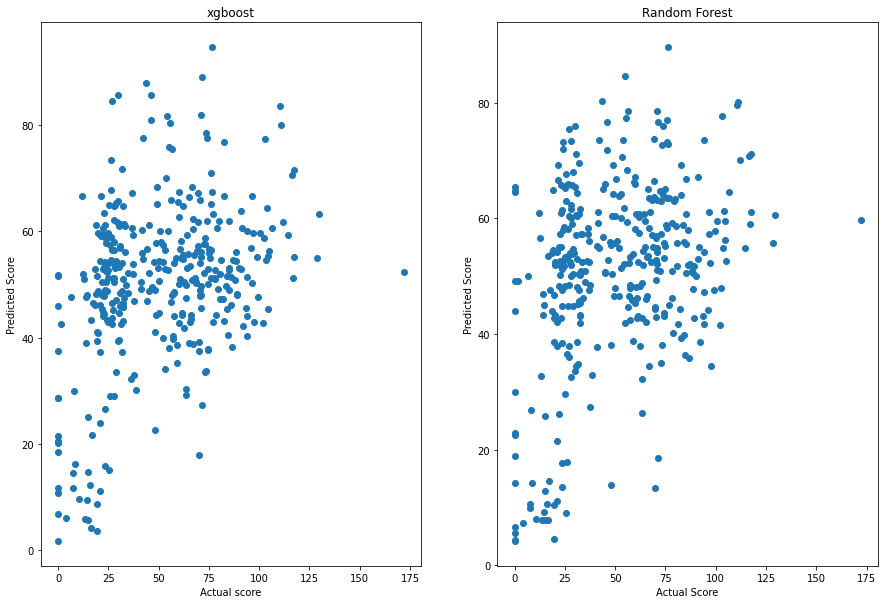

In [12]:
fig = plt.pyplot.figure(figsize=(15,10))
ax1 = plt.pyplot.subplot(121)
ax2 = plt.pyplot.subplot(122)

rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
print ("Root Mean Squared Error (Xgboost): %s" % rmse1)
ax1.scatter(y_test, y_pred_xgb)
ax1.set_xlabel("Actual score")
ax1.set_ylabel("Predicted Score")
ax1.title.set_text("xgboost")


rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr))
print ("Root Mean Squared Error (Random forest): %s" % rmse2)
ax2.scatter(y_test, y_pred_rfr)
ax2.set_xlabel("Actual Score")
ax2.set_ylabel("Predicted Score")
ax2.title.set_text("Random Forest")

{'learning_rate': 0.006, 'loss': 'square', 'n_estimators': 500}
Root Mean Squared Error (Adaboost): 27.836773560381356


Text(0, 0.5, 'Predicted Score')

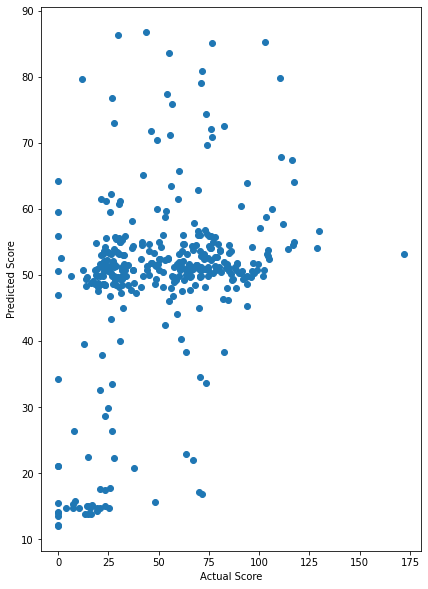

In [13]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

gsada = GridSearchCV(
        estimator=AdaBoostRegressor(),
        param_grid={
            'n_estimators': (500, 1000, 2000, 5000),
            'learning_rate': (0.006, 0.06, 0.03, 0.3, 1),
            'loss': ("exponential", "linear", "square")

        },
        cv=4, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

a_grid_result = gsada.fit(X_train, y_train)
a_best_params = a_grid_result.best_params_

#a_best_params = {'learning_rate': 0.003, 'loss': 'square', 'n_estimators': 1000}

print(a_best_params)

argr = AdaBoostRegressor(random_state=0, n_estimators=a_best_params["n_estimators"],  learning_rate=a_best_params["learning_rate"], loss=a_best_params["loss"])
argr.fit(X_train, y_train)

y_pred_ada = argr.predict(X_test)

#Save out the model
filename = '/opt/ml/work/golf/ada_finalized_model.sav'
joblib.dump(argr, filename)


rmse3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada))
print ("Root Mean Squared Error (Adaboost): %s" % rmse3)

fig = plt.pyplot.figure(figsize=(15,10))
ax1 = plt.pyplot.subplot(121)

ax1.scatter(y_test, y_pred_ada)
ax1.set_xlabel("Actual Score")
ax1.set_ylabel("Predicted Score")
#ax1.title.set_text("Adaboost")

In [15]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size="4G")

aml = H2OAutoML(max_runtime_secs=1500, max_runtime_secs_per_model=150)

h2o_pd = X.copy()
h2o_pd["y"] = y

h2o_train = X_train.copy()
h2o_train["y"] = y_train

x_h = h2o.H2OFrame(h2o_pd)
#y_h = h2o.H2OFrame(y.to_numpy())
train_h = h2o.H2OFrame(h2o_train)

aml.train(x = x_h.names, y = "y", training_frame=train_h)

aml.leaderboard

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "13" 2019-09-17; OpenJDK Runtime Environment (build 13+33); OpenJDK 64-Bit Server VM (build 13+33, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/tmpwwouh35l
  JVM stdout: /var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/tmpwwouh35l/h2o_ramundson_started_from_python.out
  JVM stderr: /var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/tmpwwouh35l/h2o_ramundson_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/Chicago
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.1
H2O_cluster_version_age:    22 days
H2O_cluster_name:           H2O_from_python_ramundson_ozftg7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.5 final
--------------------------  ------------------------------------------------------------------

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |███████████████
17:49:24.859: Skipping training of model GBM_5_AutoML_20200901_174908 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20200901_174908.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 156.0.


█████████████████████████████████████████| 100%


model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GLM_1_AutoML_20200901_174908 770.779 27.7629 770.779 23.0066 nan 
 XRT_1_AutoML_20200901_174908 795.771 28.2094 795.771 22.9765 nan 
 DeepLearning_grid__1_AutoML_20200901_174908_model_8 797.377 28.2379 797.377 22.2698 nan 
 DeepLearning_grid__2_AutoML_20200901_174908_model_6 800.777 28.298 800.777 22.7534 nan 
 StackedEnsemble_BestOfFamily_AutoML_20200901_174908 808.928 28.4417 808.928 23.0612 nan 
 GBM_grid__1_AutoML_20200901_174908_model_3 809.043 28.4437 809.043 23.0929 nan 
 DeepLearning_grid__3_AutoML_20200901_174908_model_1 810.015 28.4608 810.015 22.7869 nan 
 StackedEnsemble_AllModels_AutoML_20200901_174908 821.095 28.6548 821.095 23.629 nan 
 GBM_grid__1_AutoML_20200901_174908_model_4 823.966 28.7048 823.966 23.1504 nan 
 DRF_1_AutoML_20200901_174908 832.611 28.855 832.611 22.9744 nan

Parse progress: |█████████████████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
Root Mean Squared Error (H2O): 26.673072881337013


Text(0, 0.5, 'Predicted Score')

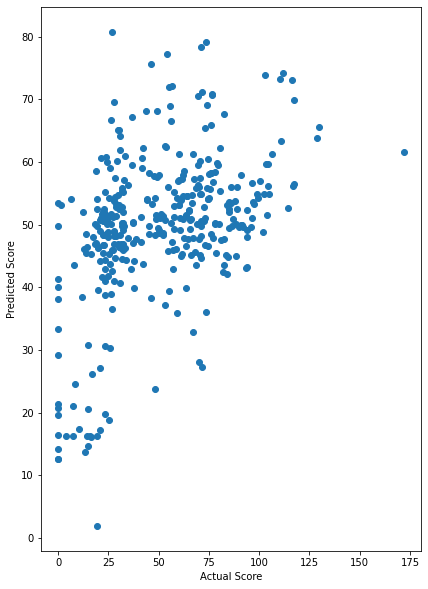

In [16]:
h2o_test_pd = X_test.copy()
h2o_test_pd["y"] = y_test

h2o_test = h2o.H2OFrame(h2o_test_pd)

y_pred_h20 = aml.leader.predict(h2o_test).as_data_frame()

#Save out the model
filename = '/opt/ml/work/golf/h20'
h2o.save_model(model=aml.leader, path=filename, force=True)

rmse7 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_h20))
print ("Root Mean Squared Error (H2O): %s" % rmse7)

fig = plt.pyplot.figure(figsize=(15,10))
ax1 = plt.pyplot.subplot(121)


ax1.scatter(y_test, y_pred_h20)
ax1.set_xlabel("Actual Score")
ax1.set_ylabel("Predicted Score")

0:	learn: 27.5884103	total: 86.5ms	remaining: 30.2s
1:	learn: 25.0969193	total: 113ms	remaining: 19.7s
2:	learn: 23.4407030	total: 136ms	remaining: 15.7s
3:	learn: 21.5379009	total: 154ms	remaining: 13.3s
4:	learn: 20.0215882	total: 171ms	remaining: 11.8s
5:	learn: 18.8465781	total: 189ms	remaining: 10.8s
6:	learn: 17.8224894	total: 208ms	remaining: 10.2s
7:	learn: 16.5352528	total: 227ms	remaining: 9.69s
8:	learn: 15.8099271	total: 244ms	remaining: 9.25s
9:	learn: 14.8320394	total: 264ms	remaining: 8.96s
10:	learn: 13.7916969	total: 281ms	remaining: 8.65s
11:	learn: 12.8367735	total: 299ms	remaining: 8.43s
12:	learn: 12.2116014	total: 317ms	remaining: 8.23s
13:	learn: 11.8448057	total: 335ms	remaining: 8.04s
14:	learn: 11.0404115	total: 352ms	remaining: 7.86s
15:	learn: 10.3337280	total: 369ms	remaining: 7.7s
16:	learn: 9.6663424	total: 387ms	remaining: 7.58s
17:	learn: 8.9996261	total: 405ms	remaining: 7.47s
18:	learn: 8.9176007	total: 423ms	remaining: 7.36s
19:	learn: 8.2734478	tota

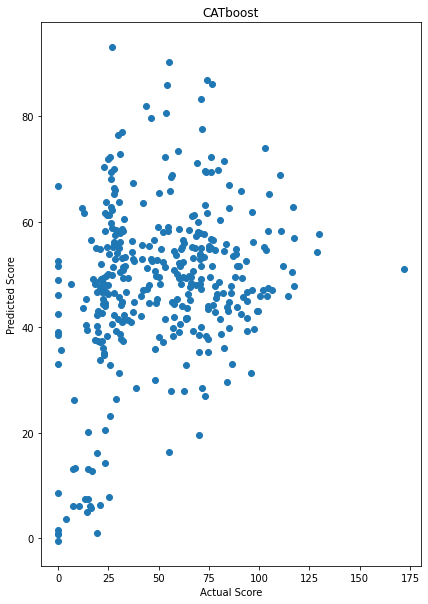

In [17]:
#CATboost! 
import catboost as cb

gscat = GridSearchCV(
        estimator=cb.CatBoostRegressor(),
        param_grid={
            'depth': [4, 7, 10, 12],
            'learning_rate' : [0.03, 0.6, 0.1, 0.06],
            'l2_leaf_reg': [1,4,9,12],
            'iterations': [350]

        },
        cv=4, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#print(X_train.head())
#print(y_train.head())
c_grid_result = gscat.fit(X_train, y_train)
c_best_params = c_grid_result.best_params_

#a_best_params = {'learning_rate': 0.003, 'loss': 'square', 'n_estimators': 1000}

print(c_best_params)

crgr = cb.CatBoostRegressor(random_state=42, depth=c_best_params["depth"],  learning_rate=c_best_params["learning_rate"], l2_leaf_reg=c_best_params["l2_leaf_reg"], iterations=c_best_params["iterations"])
crgr.fit(X_train, y_train)

y_pred_cat = crgr.predict(X_test)

#Save out the model
filename = '/opt/ml/work/golf/cat_finalized_model.sav'
joblib.dump(argr, filename)


rmse4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cat))
print ("Root Mean Squared Error (CATboost): %s" % rmse4)

fig = plt.pyplot.figure(figsize=(15,10))
ax1 = plt.pyplot.subplot(121)

ax1.scatter(y_test, y_pred_cat)
ax1.set_xlabel("Actual Score")
ax1.set_ylabel("Predicted Score")
ax1.title.set_text("CATboost")

INFO:autogluon.utils.tabular.ml.learner.default_learner:Beginning AutoGluon training ... Time limit = 120s
INFO:autogluon.utils.tabular.ml.learner.default_learner:AutoGluon will save models to /opt/ml/work/golf/ag/
INFO:autogluon.utils.tabular.ml.learner.default_learner:AutoGluon Version:  0.0.13
INFO:autogluon.utils.tabular.ml.learner.default_learner:Train Data Rows:    156
INFO:autogluon.utils.tabular.ml.learner.default_learner:Train Data Columns: 46
INFO:autogluon.utils.tabular.ml.learner.default_learner:Preprocessing data ...
INFO:autogluon.utils.tabular.ml.utils:Here are the first 10 unique label values in your data:  [32.5, 61.5, 34.0, 83.5, 57.5, 18.5, 78.0, 12.0, 100.0, 0.0]
Level 25:autogluon.utils.tabular.ml.utils:AutoGluon infers your prediction problem is: regression  (because dtype of label-column == float and many unique label-values observed).
Level 25:autogluon.utils.tabular.ml.utils:If this is wrong, please specify `problem_type` argument in fit() instead (You may spec

Root Mean Squared Error (AutoG): 27.529837643722807


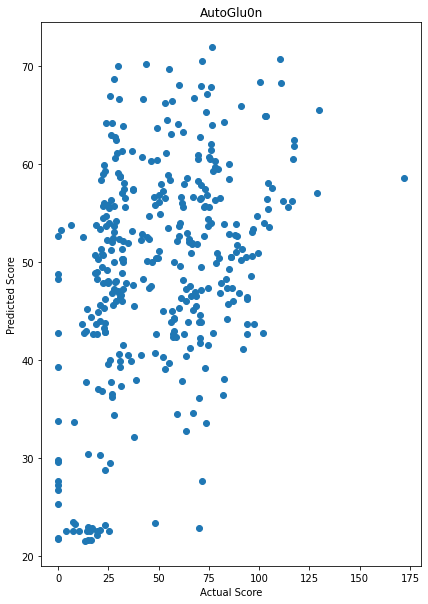

In [21]:
#import imp
#imp.reload(mxnet)

from  mxnet import gluon
import autogluon as ag
from autogluon import TabularPrediction as task

hp_tune = True  # whether or not to do hyperparameter optimization

nn_options = { # specifies non-default hyperparameter values for neural network models
    'num_epochs': 20, # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'), # activation function used in NN (categorical hyperparameter, default = first entry)
    'layers': ag.space.Categorical([100],[1000],[200,100],[300,200,100]),
      # Each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), # dropout probability (real-valued hyperparameter)
}

gbm_options = { # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 150, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36), # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {'NN': nn_options, 'GBM': gbm_options}  # hyperparameters of each model type
# If one of these keys is missing from hyperparameters dict, then no models of that type are trained.

time_limits = 2*60  # train various models for ~2 min
num_trials = 7  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine


a_train = X_train.copy()
a_train["autog"] = y_train

agrp = task.fit(train_data=a_train, label="autog", auto_stack=True, time_limits=time_limits, num_trials=num_trials,
                     hyperparameter_tune=hp_tune, hyperparameters=hyperparameters, 
                     search_strategy=search_strategy, output_directory='/opt/ml/work/golf/ag')

y_pred_agluon = agrp.predict(X_test)

#Save out the model
filename = '/opt/ml/work/golf/agluon_finalized_model.sav'
joblib.dump(agrp, filename)


rmse5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_agluon))
print ("Root Mean Squared Error (AutoG): %s" % rmse5)

fig = plt.pyplot.figure(figsize=(15,10))
ax1 = plt.pyplot.subplot(121)

ax1.scatter(y_test, y_pred_agluon)
ax1.set_xlabel("Actual Score")
ax1.set_ylabel("Predicted Score")
ax1.title.set_text("AutoGlu0n")

Feature ranking:


<AxesSubplot:>

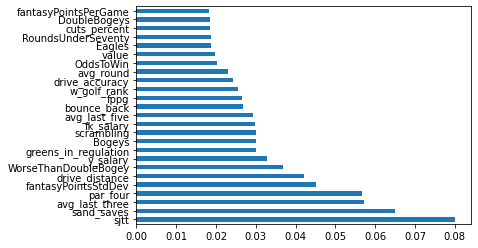

In [22]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

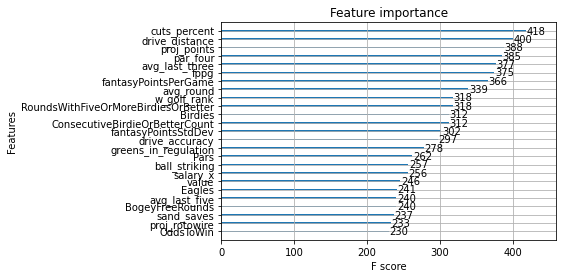

In [23]:
xgb.plot_importance(regr, max_num_features=25)

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.


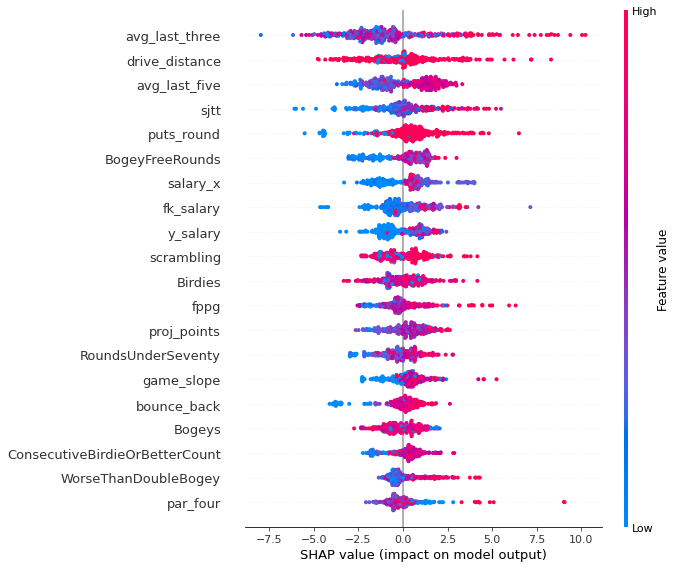

In [25]:
from catboost import *
import shap

importances = crgr.feature_importances_
shap_values = crgr.get_feature_importance(Pool(X_test, label=y_test), 
                                                                     type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
#shap.force_plot(expected_value, shap_values[3,:], X_test.iloc[3,:])

shap.summary_plot(shap_values, X_test)

Feature ranking:


<AxesSubplot:>

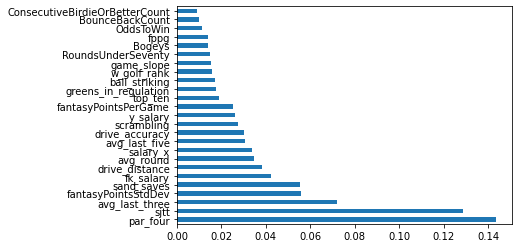

In [26]:
importances = argr.feature_importances_
std = np.std([tree.feature_importances_ for tree in argr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [27]:

#SHAP explainer
#%initjs()
import shap
shap.initjs()

explainerXGB = shap.TreeExplainer(regr)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test, X_test)

NPY_ARRAY_UPDATEIFCOPY, NPY_ARRAY_INOUT_ARRAY, and NPY_ARRAY_INOUT_FARRAY are deprecated, use NPY_WRITEBACKIFCOPY, NPY_ARRAY_INOUT_ARRAY2, or NPY_ARRAY_INOUT_FARRAY2 respectively instead, and call PyArray_ResolveWritebackIfCopy before the array is deallocated, i.e. before the last call to Py_DECREF.
UPDATEIFCOPY detected in array_dealloc.  Required call to PyArray_ResolveWritebackIfCopy or PyArray_DiscardWritebackIfCopy is missing


In [28]:
#SHAP explainer
#%initjs()
import shap
shap.initjs()

explainerRFOR = shap.TreeExplainer(rfr)
shap_values_RFOR_test = explainerRFOR.shap_values(X_test)
shap.force_plot(explainerRFOR.expected_value, shap_values_RFOR_test, X_test)

In [ ]:
from sklearn.externals import joblib
import h2o

rfr = joblib.load('/opt/ml/work/golf/rfr_finalized_model.sav')
regr = joblib.load('/opt/ml/work/golf/xgb_finalized_model.sav')
argr =  joblib.load('/opt/ml/work/golf/ada_finalized_model.sav')
crgr =  joblib.load('/opt/ml/work/golf/cat_finalized_model.sav')
agrp = joblib.load('/opt/ml/work/golf/agluon_finalized_model.sav')
# load the model
saved_model = h2o.load_model('/opt/ml/work/golf/h2o')

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[18:02:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostRegressor from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [58]:
## RUN after
import numpy as np

code_columns = []
#float_columns = ["fppg", "dvp_rank", "max_rank", "salary", "is_home", "player.draftRanksByRankType.STANDARD.rank", "player.ownership.auctionValueAverage", "player.ownership.auctionValueAverageChange",
#                 "player.ownership.percentChange", "player.ownership.percentOwned", "player.ownership.percentStarted", "player.proTeamId", "avg_last_three", "avg_last_five",
#                 "ratings.0.positionalRanking", "ratings.0.totalRanking","ratings.0.totalRating", "watson_outside", "watson_low", "watson_high", "watson_alt_score", "watson_score"]
float_columns = ["fppg", "fk_salary", "salary_x", "par_four", "cuts_percent", "drive_distance", "greens_in_regulation", "drive_accuracy", "ball_striking", "scrambling", "bounce_back", "sand_saves", "avg_round", "puts_round", "top_three", "top_ten", "fantasyPointsPerGame", "fantasyPointsStdDev", "y_salary",  "proj_points", "proj_rotowire", "value", "avg_last_three", "avg_last_five", "w_golf_rank", "sjtt", "game_par", "game_yards", "game_slope",
                 "Eagles", "Birdies", "Pars", "Bogeys", "WorseThanDoubleBogey", "DoubleBogeys", "StreaksOfThreeBirdiesOrBetter", "StreaksOfFourBirdiesOrBetter", "StreaksOfFiveBirdiesOrBetter", "RoundsWithFiveOrMoreBirdiesOrBetter", "ConsecutiveBirdieOrBetterCount", "BounceBackCount", "BogeyFreeRounds", "RoundsUnderSeventy", "Win", "OddsToWin"]
code_features = []
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

#for name in code_columns:
#  merged[name].fillna("none", inplace=True) 
#  codeName = "%s_code" % name
#  print ("creating %s" % codeName)
#  merged[codeName] = lb_make.fit_transform(merged[name])
#  code_features.append(codeName)

# Drop any N/A or infinite values
prediction = merged[code_columns + float_columns]

prediction = pd.get_dummies(prediction, columns=code_columns, drop_first=True)

prediction = prediction.astype(np.float64)

#prediction["watson_score"] = merged["watson_score"]

cols = code_columns + float_columns
feats = rfr.feature_names
print (feats)
print (cols)

diffCols = set(cols) - set(feats)

for newCol in diffCols:
  print(newCol)
  #prediction.drop(newCol, axis=1)


diffCols = set(feats) - set(cols)
for newCol in diffCols:
  print(newCol)
  prediction[newCol] = 0

# Drop any N/A or infinite values
prediction.replace([np.inf, -np.inf], np.nan)
prediction.fillna(0, inplace=True)
prediction = prediction[feats]

# for h2o predictions 
h2o_preds = h2o.H2OFrame(prediction)

merged["h2opreds"] = aml.leader.predict(h2o_preds).as_data_frame()

merged["preds"] = rfr.predict(prediction)

merged["xpreds"] = regr.predict(prediction)

merged["apreds"] = argr.predict(prediction)

merged["cpreds"] = crgr.predict(prediction)

merged["autogpreds"] = agrp.predict(prediction)


merged["points"] = 0

# Write this out to load later
dateString = datetime.now().strftime('%Y-%m-%d')

merged.to_csv('/opt/ml/work/golf/%s.all_data.csv' % dateString)

merged.head()

['fppg', 'fk_salary', 'salary_x', 'par_four', 'cuts_percent', 'drive_distance', 'greens_in_regulation', 'drive_accuracy', 'ball_striking', 'scrambling', 'bounce_back', 'sand_saves', 'avg_round', 'puts_round', 'top_three', 'top_ten', 'fantasyPointsPerGame', 'fantasyPointsStdDev', 'y_salary', 'proj_points', 'proj_rotowire', 'value', 'avg_last_three', 'avg_last_five', 'w_golf_rank', 'sjtt', 'game_par', 'game_yards', 'game_slope', 'Eagles', 'Birdies', 'Pars', 'Bogeys', 'WorseThanDoubleBogey', 'DoubleBogeys', 'StreaksOfThreeBirdiesOrBetter', 'StreaksOfFourBirdiesOrBetter', 'StreaksOfFiveBirdiesOrBetter', 'RoundsWithFiveOrMoreBirdiesOrBetter', 'ConsecutiveBirdieOrBetterCount', 'BounceBackCount', 'BogeyFreeRounds', 'RoundsUnderSeventy', 'Win', 'OddsToWin']
['fppg', 'fk_salary', 'salary_x', 'par_four', 'cuts_percent', 'drive_distance', 'greens_in_regulation', 'drive_accuracy', 'ball_striking', 'scrambling', 'bounce_back', 'sand_saves', 'avg_round', 'puts_round', 'top_three', 'top_ten', 'fantas

dvp_rank first_name_x                                          fixture       fppg         id_x                                             images  injured injury_details injury_severity injury_status jersey_number known_name last_name_x max_rank                                news  played                                    player_card_url position_x                           projected_fantasy_points projected_starting_order  rank                          recent_games_played_stats  removed                              roster_position_stats  salary_x     sport_specific  starting_order  swappable  team  tier            videos  game_par  game_yards  game_rating  game_slope  game_stimp game_fairways     game_rough    game_greens                                        competition                                       competitions      displayName draftAlerts                                draftStatAttributes  draftableId firstName_x  fk_salary  isDisabled  isSwappable lastName_x  \
0     None       Dustin  {'_members': ['167175'], '_ref': 'fixtures.id'}  82.107694  49208-78289  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None     Johnson     None  {'latest': '2020-08-30T23:34:52Z'}      13  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 79.43, 'supported...                     None  1000  {'LAST_10': {'fppg': 77.31, 'played': 10}, 'LA...    False  [{'fppg': 82.10769418569711, 'player_position'...     14400  {'cuts_made': 10}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...   Dustin Johnson          []  [{'id': 795, 'value': '82.5', 'sortValue': '82...     15246095      Dustin      15200       False         True    Johnson   
1     None          Jon  {'_members': ['167175'], '_ref': 'fixtures.id'}  91.266667  49208-78707  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None        Rahm     None  {'latest': '2020-08-30T23:46:51Z'}      15  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 74.43, 'supported...                     None  1000  {'LAST_10': {'fppg': 76.7, 'played': 10}, 'LAS...    False  [{'fppg': 91.26666666666667, 'player_position'...     12500  {'cuts_made': 14}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...         Jon Rahm          []  [{'id': 795, 'value': '87.9', 'sortValue': '87...     15246096         Jon      12700       False         True       Rahm   
2     None       Justin  {'_members': ['167175'], '_ref': 'fixtures.id'}  88.483331  49208-78893  {'default': {'height': 200, 'url': 'https://d1...    False           None            None          None          None       None      Thomas     None  {'latest': '2020-08-31T00:16:22Z'}      18  https://www.fanduel.com/mobile/games/49208/pla...          G  {'projected_fantasy_points': 77.52, 'supported...                     None  1000  {'LAST_10': {'fppg': 77.11, 'played': 10}, 'LA...    False  [{'fppg': 88.48333062065973, 'player_position'...     12000  {'cuts_made': 15}              -1       True  None  None  {'latest': None}       284        7346         76.2         146        12.5  Zoysia Grass  Bermuda Grass  Bermuda Grass  {'competitionId': 5635583, 'name': 'TOUR Champ...  [{'competitionId': 5635583, 'name': 'TOUR Cham...    Justin Thomas          []  [{'id': 795, 'value': '84.1', 'sortValue': '84...     15246097      Justin      11900       False         True     Thomas   
3     None         Webb  {'_me

In [ ]:
availables = availables[~availables.name.isin(["Michael Thompson"])]

To change to draft kings, I change the salary cap to 50000 and use the "fk_salary" and re-run the cells below. The fk salary is draft kings salaries and they cap at 50k. 

In [69]:
from scipy import stats

#This is the salary cap for PULP constraints
#SALARY_CAP = 60000
#SALARY_CAP = 200
SALARY_CAP = 50000
#SALARY_CAP = 10000000

#Use random forest predictions this time:

#merged["points"] = merged["preds"]
#
#Redo merge
#do_merge()

#final = merged.reindex(columns = ["position", 'name', "salary", "points", "preds", "xpreds", "apreds", "fd_proj", "fp_proj", "id"])
#final = merged[["position", 'name', "salary_x", "points", "preds", "xpreds", "apreds", "fd_proj", "fp_proj", "fs_proj", "nf_proj", "id"]]
final = merged[["position_x", 'name', "salary_x", "y_salary", "fk_salary", "sc", "projectedPoints", "preds", "xpreds", "apreds", "cpreds", "autogpreds", "h2opreds", "proj_points", "nf_proj", "FantasyPoints", "id_x"]]

final.fillna(0, inplace=True)
#final["points"] = merged["xpreds"]
#final["points"] = (merged["xpreds"] + merged["preds"]) / 2
#final["points"] = (final["fd_proj"] + final["fp_proj"] + final["fs_proj"] + final["nf_proj"] + final["preds"] + final["xpreds"] + final["apreds"]) / 7

final["points"] = (final["xpreds"] + final["cpreds"] + final["autogpreds"] + final["h2opreds"] + final["proj_points"] + final["nf_proj"] + final["FantasyPoints"]) / 7

print("Get var")

#final["salary"] = final["y_salary"]
#final["salary"] = final["salary_x"]
final["salary"] = final["fk_salary"]
#final["salary"] = final["sc"]
final["position"] = final["position_x"]


final["var"] = final.apply(lambda x: stats.sem([x["proj_points"], x["xpreds"], x["cpreds"], x["autogpreds"], x["h2opreds"], x["nf_proj"], x["FantasyPoints"]]), axis=1)

# compute relative variance
final["percent"] = (1 - (final["var"] / final["points"]))
final["adj_points"] = round(final["points"] * final["percent"], 4)

#print(merged[["xpreds", "preds", "apreds"]].std(axis=1))

#final["points"] = round(final["points"] * final["percent"], 4)


# Write this out to load later
dateString = datetime.now().strftime('%Y-%m-%d')

final.to_csv('/opt/ml/work/golf/%s.final_data.csv' % dateString)

availables = final[["position", 'name', "salary", "points"]]

#availables["points"] = final["adj_points"]

#availables = final.groupby(["position", 'name', "salary", "points"]).agg("count")
#availables = availables.reset_index()

print(availables.position.unique())
print(final.head())

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Get var



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

['G']
  position_x             name  salary_x  y_salary  fk_salary       sc  projectedPoints      preds     xpreds     apreds     cpreds  autogpreds   h2opreds  proj_points  nf_proj  FantasyPoints         id_x     points  salary position       var   percent  adj_points
0          G   Dustin Johnson     14400        50      15200  1820000              0.0  73.090000  76.957954  75.474359  62.787049   63.833992  80.267970        97.92     78.5             92  49208-78289  78.895281   15200        G  4.942009  0.937360     73.9533
1          G         Jon Rahm     12500        47      12700  1750000              0.0  73.484333  81.997070  85.833333  79.780629   69.479271  77.044165        90.51     73.5             93  49208-78707  80.758734   12700        G  3.240883  0.959870     77.5179
2          G    Justin Thomas     12000        48      11900  1690000              0.0  68.745000  67.157906  60.655340  54.410568   56.923286  73.216385       100.96     76.7             81  49208-7889

In [157]:
#SALARY_CAP = 60000


salaries = {}
points = {}
flex = {}
for pos in availables.position.unique():
    available_pos = availables[availables.position == pos]
    salary = list(available_pos[["name","salary"]].set_index("name").to_dict().values())[0]
    point = list(available_pos[["name","points"]].set_index("name").to_dict().values())[0]
    salaries[pos] = salary
    points[pos] = point
pos_num_available = {
    "G": 6,
}

#print(points.items())

_vars = {"G": LpVariable.dict("G", points["G"], cat="Binary")}

prob = LpProblem("Fantasy", LpMaximize)
rewards = []
costs = []
position_constraints = []

# Setting up the reward
for k, v in _vars.items():
    costs += lpSum([salaries[k][i] * _vars[k][i] for i in v])
    rewards += lpSum([points[k][i] * _vars[k][i] for i in v])
    prob += lpSum([_vars[k][i] for i in v]) == pos_num_available[k]
    
prob += lpSum(rewards)
prob += lpSum(costs) <= SALARY_CAP


prob.writeLP("/opt/ml/work/golf/FantasyModel.lp")
prob.solve()

def summary(prob):
    results = {}
    div = '---------------------------------------\n'
    print("Variables:\n")
    score = str(prob.objective)
    constraints = [str(const) for const in prob.constraints.values()]
    for v in prob.variables():
        score = score.replace(v.name, str(v.varValue))
        constraints = [const.replace(v.name, str(v.varValue)) for const in constraints]
        if v.varValue != 0:
            print(v.name, "=", v.varValue)
            parts = v.name.split("_")
            results[" ".join(parts[1:])] = parts[0]
    print(div)
    print("Constraints:")
    for constraint in constraints:
        constraint_pretty = " + ".join(re.findall("[0-9.]*\\*1.0", constraint))
        if constraint_pretty != "":
            print("{} = {}".format(constraint_pretty, eval(constraint_pretty)))
    print(div)
    print("Score:")
    score_pretty = " + ".join(re.findall("[0-9.]+\\*1.0", score))
    print("{} = {}".format(score_pretty, eval(score)))

    return (results, eval(score))
    
namesPosDict, totalScore = summary(prob)



Variables:

G_Bryson_DeChambeau = 1.0
G_Jon_Rahm = 1.0
G_Kevin_Na = 1.0
G_Patrick_Reed = 1.0
G_Sebastian_Munoz = 1.0
G_Tyrrell_Hatton = 1.0
---------------------------------------

Constraints:
10100*1.0 + 12700*1.0 + 5500*1.0 + 8500*1.0 + 5900*1.0 + 7000*1.0 = 49700.0
---------------------------------------

Score:
71.17178136812713*1.0 + 80.7587335062137*1.0 + 56.0915173404987*1.0 + 64.98061174587305*1.0 + 56.73333480777436*1.0 + 63.25658736286098*1.0 = 392.99256613134787


In [72]:
from collections import defaultdict
import gzip
import requests

namesIdDict = {}
posIdDict = defaultdict(list)

for key in namesPosDict.keys():

  fd_id = final.loc[final["name"] == key].values[0][5]
  namesIdDict[key] = fd_id
  #Change D to DEF
  pos = namesPosDict[key]
  if pos == 'D':
    pos = 'DEF'
  posIdDict[namesPosDict[key]].append(fd_id)

lineup = []

for pos, ids in posIdDict.items():
  for sid in ids:
    lineup.append({"position": pos, "player": {"id": sid}})

entryJson = {"entries":[
                        {"entry_fee":{"currency":"usd"},
                            "roster":{"lineup":lineup}
                         }
                        ]
             }

print(str(namesPosDict))

#availables = availables[~availables.name.isin(namesPosDict.keys())]

#for entry in ENTRY_LIST:
#  url = 'https://api.fanduel.com/entries/%s' % entry 
#  headers = fd_headers.copy()
#  headers["Content-type"] : "gzip"
#  headers["authority"] =  "api.fanduel.com"
#  headers["referer"] = "https://www.fanduel.com/games/41463/contests/41463-232514383/entries/%s/edit" % entry
#  response = requests.put(url,
#                     headers=headers,
#                     data=gzip.compress(bytes(json.dumps(entryJson),'utf-8')))
#  data = json.loads(response.content)

#  print(data)

{'Daniel Berger': 'G', 'Harris English': 'G', 'Ryan Palmer': 'G', 'Viktor Hovland': 'G', 'Webb Simpson': 'G', 'Xander Schauffele': 'G'}


In [158]:
import math
import csv

NUMBER_PERMUTATIONS = 20
golfers = pd.DataFrame(columns=["G", "G", "G", "G", "G", "G"])

# Write this out to load later
dateString = datetime.now().strftime('%Y-%m-%d')

with open('/opt/ml/work/golf/lineups/%s.fanduellineup.csv' % dateString, 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["G", "G", "G", "G", "G", "G"])
    for i in range(NUMBER_PERMUTATIONS):
      
      prob += lpSum(rewards) <= math.floor(totalScore * 100) /100

      prob.solve()
      namesPosDict, totalScore = summary(prob)

      golferList = []
      for key in namesPosDict.keys():

        fd_id = final.loc[final["name"] == key].values[0][5]
        namesIdDict[key] = fd_id

        pos = namesPosDict[key]

        golferList.append(fd_id)

      spamwriter.writerow(golferList)


#golfers.to_csv()

#golfers.head()


Variables:

G_Billy_Horschel = 1.0
G_Bryson_DeChambeau = 1.0
G_Jon_Rahm = 1.0
G_Patrick_Reed = 1.0
G_Sebastian_Munoz = 1.0
G_Tyrrell_Hatton = 1.0
---------------------------------------

Constraints:
5700*1.0 + 10100*1.0 + 12700*1.0 + 8500*1.0 + 5900*1.0 + 7000*1.0 = 49900.0
55.86736467413624*1.0 + 71.17178136812713*1.0 + 80.7587335062137*1.0 + 64.98061174587305*1.0 + 56.73333480777436*1.0 + 63.25658736286098*1.0 = 392.76841346498543
---------------------------------------

Score:
55.86736467413624*1.0 + 71.17178136812713*1.0 + 80.7587335062137*1.0 + 64.98061174587305*1.0 + 56.73333480777436*1.0 + 63.25658736286098*1.0 = 392.76841346498543
Variables:

G_Billy_Horschel = 1.0
G_Bryson_DeChambeau = 1.0
G_Jon_Rahm = 1.0
G_Kevin_Na = 1.0
G_Patrick_Reed = 1.0
G_Tyrrell_Hatton = 1.0
---------------------------------------

Constraints:
5700*1.0 + 10100*1.0 + 12700*1.0 + 5500*1.0 + 8500*1.0 + 7000*1.0 = 49500.0
55.86736467413624*1.0 + 71.17178136812713*1.0 + 80.7587335062137*1.0 + 56.091517340